# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    X = keras.layers.Dense(units=512, activation='relu')(input_layer)
    X = keras.layers.Dropout(0.2)(X)
    X = keras.layers.Dense(units=256, activation='relu')(X)
    X = keras.layers.Dense(units=256, activation='relu')(X)
    X = keras.layers.Dropout(0.2)(X)
    X = keras.layers.Dense(units=128, activation='relu')(X)
    X = keras.layers.Dense(units=64, activation='relu')(X)
    X = keras.layers.Dense(units=32, activation='relu')(X)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(X)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
optim_type = ['sgd', 'adam','rmsprop']
lr_list  = [0.1,0.01,0.001]
EPOCHS = 50
BATCH_SIZE = 256


In [7]:
results = {}
for lr in lr_list:
    for optim in optim_type:
        keras.backend.clear_session()

        if optim == 'sgd':
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=0.9)
        elif optim == 'adam':
            optimizer = keras.optimizers.Adam(lr=lr)
        else:
            optimizer = keras.optimizers.RMSprop(lr=lr)
        
        print(f"Run with optimizer = {optim}, lr = {lr}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
        
        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = f"model-{str(optim)}_lr-{str(lr)}" 
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}        

Run with optimizer = sgd, lr = 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128) 

50000/50000 [==============================] - 12s 239us/step - loss: 1.3871 - acc: 0.5106 - val_loss: 1.4215 - val_acc: 0.5019
Epoch 48/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.3799 - acc: 0.5119 - val_loss: 1.4307 - val_acc: 0.4979
Epoch 49/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.3799 - acc: 0.5110 - val_loss: 1.4184 - val_acc: 0.4938
Epoch 50/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.3783 - acc: 0.5112 - val_loss: 1.4272 - val_acc: 0.4965
Run with optimizer = adam, lr = 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout) 

50000/50000 [==============================] - 14s 288us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 14s 288us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 14s 288us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 14s 288us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 15s 293us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 15s 293us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 14s 288us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/

50000/50000 [==============================] - 13s 263us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 13s 252us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 13s 252us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 13s 252us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 13s 252us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 13s 251us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 13s 253us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/

Epoch 33/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.1801 - acc: 0.5760 - val_loss: 1.3327 - val_acc: 0.5264
Epoch 34/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.1624 - acc: 0.5832 - val_loss: 1.3154 - val_acc: 0.5303
Epoch 35/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.1624 - acc: 0.5817 - val_loss: 1.3305 - val_acc: 0.5345
Epoch 36/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.1458 - acc: 0.5884 - val_loss: 1.3274 - val_acc: 0.5319
Epoch 37/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.1457 - acc: 0.5898 - val_loss: 1.3393 - val_acc: 0.5316
Epoch 38/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.1285 - acc: 0.5966 - val_loss: 1.3233 - val_acc: 0.5316
Epoch 39/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.1183 - acc: 0.5950 - val_loss: 1.2928 - val_acc: 0.5409
Epoch 40/50
50000/50

Epoch 29/50
50000/50000 [==============================] - 14s 287us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 14s 285us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 14s 284us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 14s 285us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 14s 284us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 14s 284us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 14s 283us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

50000/50000 [==============================] - 13s 268us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 13s 269us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 14s 281us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 13s 261us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 13s 256us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 13s 257us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 13s 256us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/

Epoch 20/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5513 - acc: 0.4444 - val_loss: 1.5048 - val_acc: 0.4589
Epoch 21/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5353 - acc: 0.4502 - val_loss: 1.5004 - val_acc: 0.4652
Epoch 22/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5217 - acc: 0.4538 - val_loss: 1.4822 - val_acc: 0.4709
Epoch 23/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5098 - acc: 0.4568 - val_loss: 1.4822 - val_acc: 0.4675
Epoch 24/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4961 - acc: 0.4633 - val_loss: 1.4664 - val_acc: 0.4762
Epoch 25/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4825 - acc: 0.4690 - val_loss: 1.4533 - val_acc: 0.4776
Epoch 26/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.4721 - acc: 0.4707 - val_loss: 1.4438 - val_acc: 0.4835
Epoch 27/50
50000/50

50000/50000 [==============================] - 14s 285us/step - loss: 1.4681 - acc: 0.4739 - val_loss: 1.4579 - val_acc: 0.4773
Epoch 17/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.4508 - acc: 0.4781 - val_loss: 1.4377 - val_acc: 0.4927
Epoch 18/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.4524 - acc: 0.4762 - val_loss: 1.4433 - val_acc: 0.4824
Epoch 19/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.4369 - acc: 0.4826 - val_loss: 1.4341 - val_acc: 0.4892
Epoch 20/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.4187 - acc: 0.4913 - val_loss: 1.4256 - val_acc: 0.4965
Epoch 21/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.4134 - acc: 0.4922 - val_loss: 1.4117 - val_acc: 0.4995
Epoch 22/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.4035 - acc: 0.4965 - val_loss: 1.4174 - val_acc: 0.4928
Epoch 23/50
50000/50000 [=======

50000/50000 [==============================] - 13s 267us/step - loss: 1.5846 - acc: 0.4344 - val_loss: 1.5839 - val_acc: 0.4297
Epoch 13/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.5722 - acc: 0.4378 - val_loss: 1.6388 - val_acc: 0.4160
Epoch 14/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.5524 - acc: 0.4455 - val_loss: 1.5632 - val_acc: 0.4483
Epoch 15/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.5369 - acc: 0.4505 - val_loss: 1.5706 - val_acc: 0.4336
Epoch 16/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.5192 - acc: 0.4564 - val_loss: 1.5108 - val_acc: 0.4524
Epoch 17/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.5016 - acc: 0.4657 - val_loss: 1.5670 - val_acc: 0.4463
Epoch 18/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.4918 - acc: 0.4669 - val_loss: 1.5856 - val_acc: 0.4356
Epoch 19/50
50000/50000 [=======

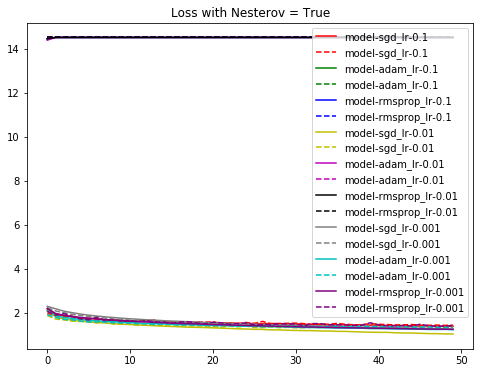

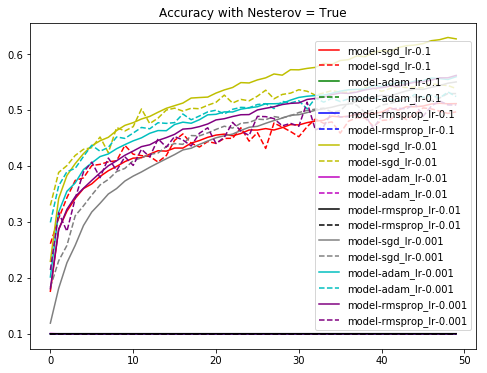

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "gray","c","purple"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss with Nesterov = True")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy with Nesterov = True")
plt.legend()
plt.show()